# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Teresia Yunita Putriani N
- **Email:** 6162001042@student.unpar.ac.id
- **ID Dicoding:** M232D4KX1526

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan Dew Point (titik embun) di Shunyi?
- Bagaimana perubahan hujan dan kecepatan udara di Shunyi selama periode jam, harian, bulanan, dan tahunan?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Proses pembuatan data 'data_df' yang menampilkan informasi dari file data sumber dalam format(.csv).

In [2]:
data_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
data_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


### Assessing Data

Assesing data yaitu mengidentifikasi masalah yang terdapat dalam data dan memastikan data berkualitas. Pertama, mencari informasi tentang tipe data dari masing-masing variabel dalam dataset.  

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Kemudian dilakukan pencarian variabel yang tidak memiliki nilai. Beberapa variabel ditemukan tidak memiliki nilai, seperti yang ditunjukkan pada hasil berikut :

In [4]:
data_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

Lalu perhitungan jumlah duplikasi.asilnya menunjukkan bahwa tidak ada data yang terduplikasi.

In [5]:
print("Jumlah duplikasi: ", data_df.duplicated().sum())

Jumlah duplikasi:  0


Selanjutnya untuk menampilkan parameter statistik dari masing-masing variabel.

In [6]:
data_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


### Cleaning Data

Langkah pertama proses pembersihan data adalah menghapus kolom variabel 'station'. Ini dilakukan karena semua data yang digunakan berasal dari Shunyi sehingga kolom tersebut tidak diperlukan.

In [7]:
data_df = data_df.drop(columns = {'station'})
data_df.head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5


Kemudian dilakukan pengisian parameter variabel yang kosong. Variabel yang kosong ini diasumsikan memiliki karakteristik yang stabil dan cenderung jarang mengalami perubahan mendadak, sehingga nilainya diasumsikan sama dengan nilai sebelumnya.

In [8]:
data_df.fillna(method = "ffill", inplace=True)

Pengecekan kembali elemen variabel yang kosong

In [9]:
data_df.isna().sum()

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore `data_df`



Tampilan 5 data acak setelah proses data wragling.

In [11]:
data_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
29108,29109,2016,6,25,20,33.0,58.0,2.0,48.0,500.0,107.0,31.5,1002.0,11.8,0.0,SE,2.1
20822,20823,2015,7,16,14,24.0,24.0,2.0,10.0,700.0,105.0,25.0,1004.0,18.4,0.0,N,2.4
9543,9544,2014,4,2,15,98.0,129.0,22.0,98.0,800.0,91.0,22.1,1011.4,0.0,0.0,SSE,3.6
16459,16460,2015,1,15,19,470.0,470.0,54.0,150.0,5600.0,21.0,0.0,1020.0,-5.4,0.0,SE,1.3
10659,10660,2014,5,19,3,46.0,46.0,2.0,112.0,400.0,128.0,17.8,1004.0,16.0,4.0,NE,2.3


Dew Point (Titik Embun) di Shunyi dibagi menjadi 4 data per-jam, harian, bulanan serta tahunan.


Berikut data selama 19 jam pada tanggal 01-03-2013 dengan rentang pukul 00.00-19.00 menampilkan 20 data

In [12]:
dewp_hour = data_df.groupby(by = ['year', 'month', 'day','hour'] ).agg({
            "DEWP" : "mean"}).sort_values(by = ['year', 'month', 'day','hour'], ascending = True)
dewp_hour = dewp_hour.reset_index()
dewp_hour['time'] = dewp_hour["hour"].astype(str) + ":00"
dewp_hour.head(20)

,year,month,day,hour,DEWP,time
0,2013,3,1,0,-20.5,0:00
1,2013,3,1,1,-21.3,1:00
2,2013,3,1,2,-23.0,2:00
3,2013,3,1,3,-23.3,3:00
4,2013,3,1,4,-22.9,4:00
5,2013,3,1,5,-22.1,5:00
6,2013,3,1,6,-21.2,6:00
7,2013,3,1,7,-21.3,7:00
8,2013,3,1,8,-21.8,8:00
9,2013,3,1,9,-22.9,9:00


Berikut data selama 10 hari dari tanggal 01-03-2013 sampai 10-03-2013 menampilkan 10 data

In [13]:
dewp_day = data_df.groupby(by = ['year', 'month', 'day'] ).agg({
            "DEWP" : "mean"}).sort_values(by = ['year', 'month', 'day'], ascending = True)
dewp_day = dewp_day.reset_index()
dewp_day['time'] = dewp_day["year"].astype(str) + "-" + dewp_day["month"].astype(str) + "-" + dewp_day["day"].astype(str)
dewp_day.head(10)

,year,month,day,DEWP,time
0,2013,3,1,-20.637500,2013-3-1
1,2013,3,2,-16.275000,2013-3-2
2,2013,3,3,-11.779167,2013-3-3
3,2013,3,4,-12.437500,2013-3-4
4,2013,3,5,-7.220833,2013-3-5
5,2013,3,6,-4.804167,2013-3-6
6,2013,3,7,-1.916667,2013-3-7
7,2013,3,8,-1.720833,2013-3-8
8,2013,3,9,-10.845833,2013-3-9
9,2013,3,10,-13.233333,2013-3-10


Berikut data selama 10 bulan dari bulan Maret 2013 hingga Desember 2013 menampilkan 10 data

In [14]:
dewp_month = data_df.groupby(by = ['year', 'month'] ).agg({
            "DEWP" : "mean"}).sort_values(by = ['year', 'month'], ascending = True)
dewp_month = dewp_month.reset_index()
dewp_month['time'] = dewp_month["year"].astype(str) + "-" + dewp_month["month"].astype(str)
dewp_month.head(10)

,year,month,DEWP,time
0,2013,3,-6.539113,2013-3
1,2013,4,-3.301111,2013-4
2,2013,5,8.194624,2013-5
3,2013,6,18.491944,2013-6
4,2013,7,20.698253,2013-7
5,2013,8,20.091801,2013-8
6,2013,9,14.119028,2013-9
7,2013,10,5.213441,2013-10
8,2013,11,-7.416111,2013-11
9,2013,12,-14.042608,2013-12


Data titik embun di Shunyi selama 5 tahun dari tahun 2013 sampai 2017 dan menampilkan 5 data pertama.

In [15]:
dewp_year = data_df.groupby(by = ['year'] ).agg({
            "DEWP" : "mean"}).sort_values(by = ['year'], ascending = True)
dewp_year = dewp_year.reset_index()
dewp_year['time'] = dewp_year["year"].astype(str)
dewp_year.head(5)

,year,DEWP,time
0,2013,5.552029,2013
1,2014,2.437797,2014
2,2015,2.676655,2015
3,2016,2.178871,2016
4,2017,-13.267726,2017


Perubahan Hujan dan Kecepatan Udara di Shunyi dibagi menjadi 4 data per-jam, harian, bulanan serta tahunan.



Berikut data selama 19 jam pada tanggal 01-03-2013 dengan rentang pukul 00.00-19.00 menampilkan 20 data

In [16]:
air_parameters_hour = data_df.groupby(by = ['year', 'month', 'day','hour'] ).agg({
            "RAIN" : "mean",
            "WSPM" : "mean"}).sort_values(by = ['year', 'month', 'day','hour'], ascending = True)
air_parameters_hour = air_parameters_hour.reset_index()
air_parameters_hour['time'] = air_parameters_hour["hour"].astype(str) + ":00"
air_parameters_hour.head(20)

,year,month,day,hour,RAIN,WSPM,time
0,2013,3,1,0,0.0,9.3,0:00
1,2013,3,1,1,0.0,9.4,1:00
2,2013,3,1,2,0.0,8.6,2:00
3,2013,3,1,3,0.0,6.6,3:00
4,2013,3,1,4,0.0,4.5,4:00
5,2013,3,1,5,0.0,1.7,5:00
6,2013,3,1,6,0.0,1.6,6:00
7,2013,3,1,7,0.0,1.7,7:00
8,2013,3,1,8,0.0,2.7,8:00
9,2013,3,1,9,0.0,0.8,9:00


Berikut data selama 10 hari dari tanggal 01-03-2013 sampai 10-03-2013 menampilkan 10 data

In [17]:
air_parameters_day = data_df.groupby(by = ['year', 'month', 'day'] ).agg({
            "RAIN" : "mean",
            "WSPM" : "mean"}).sort_values(by = ['year', 'month', 'day'], ascending = True)
air_parameters_day = air_parameters_day.reset_index()
air_parameters_day['time'] = air_parameters_day["year"].astype(str) + "-" + air_parameters_day["month"].astype(str) + "-" + air_parameters_day["day"].astype(str)
air_parameters_day.head(10)

,year,month,day,RAIN,WSPM,time
0,2013,3,1,0.0,3.166667,2013-3-1
1,2013,3,2,0.0,1.345833,2013-3-2
2,2013,3,3,0.0,1.625000,2013-3-3
3,2013,3,4,0.0,2.091667,2013-3-4
4,2013,3,5,0.0,1.195833,2013-3-5
5,2013,3,6,0.0,1.200000,2013-3-6
6,2013,3,7,0.0,1.145833,2013-3-7
7,2013,3,8,0.0,2.316667,2013-3-8
8,2013,3,9,0.0,4.583333,2013-3-9
9,2013,3,10,0.0,2.150000,2013-3-10


Berikut data selama 10 bulan dari bulan Maret 2013 hingga Desember 2013 menampilkan 10 data

In [18]:
air_parameters_month = data_df.groupby(by = ['year', 'month']).agg({
            "RAIN" : "mean",
            "WSPM" : "mean"}).sort_values(by = ['year', 'month'], ascending = True)
air_parameters_month = air_parameters_month.reset_index()
air_parameters_month['time'] = air_parameters_month["year"].astype(str) + "-" + air_parameters_month["month"].astype(str)
air_parameters_month.head(10)

,year,month,RAIN,WSPM,time
0,2013,3,0.020296,2.070833,2013-3
1,2013,4,0.012778,2.537222,2013-4
2,2013,5,0.002016,2.054839,2013-5
3,2013,6,0.154306,1.538194,2013-6
4,2013,7,0.268414,1.622043,2013-7
5,2013,8,0.120430,1.618145,2013-8
6,2013,9,0.058472,1.387917,2013-9
7,2013,10,0.010484,1.380780,2013-10
8,2013,11,0.000000,1.994722,2013-11
9,2013,12,0.000000,1.911156,2013-12


Berikut data selama 5 tahun dari tahun 2013 hingga 2017 menampilkan 5 data

In [19]:
air_parameters_year = data_df.groupby(by = ['year'] ).agg({
            "RAIN" : "mean",
            "WSPM" : "mean"}).sort_values(by = ['year'], ascending = True)
air_parameters_year = air_parameters_year.reset_index()
air_parameters_year['time'] = air_parameters_year["year"].astype(str)
air_parameters_year.head(5)

,year,RAIN,WSPM,time
0,2013,0.064828,1.810893,2013
1,2014,0.050890,1.739612,2014
2,2015,0.076313,1.773642,2015
3,2016,0.062079,1.878654,2016
4,2017,0.002613,1.979873,2017


### Explore all data

In [51]:
all_df['date_time'] = pd.to_datetime(data_df[['year', 'month', 'day', 'hour']])
all_df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,date_time
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,2013-03-01 00:00:00
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,2013-03-01 01:00:00
2,3,2013,3,1,2,14.0,14.0,3.0,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,2013-03-01 02:00:00
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,200.0,22.0,-2.1,1027.3,-23.3,0.0,NW,6.6,2013-03-01 03:00:00
4,5,2013,3,1,4,12.0,12.0,3.0,5.0,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,2013-03-01 04:00:00
5,6,2013,3,1,5,11.0,11.0,3.0,7.0,200.0,45.0,-2.8,1028.2,-22.1,0.0,NNW,1.7,2013-03-01 05:00:00
6,7,2013,3,1,6,12.0,12.0,3.0,9.0,300.0,74.0,-4.0,1029.0,-21.2,0.0,NNE,1.6,2013-03-01 06:00:00
7,8,2013,3,1,7,13.0,13.0,3.0,23.0,300.0,59.0,-2.4,1030.5,-21.3,0.0,NE,1.7,2013-03-01 07:00:00
8,9,2013,3,1,8,8.0,8.0,3.0,19.0,400.0,66.0,-1.0,1031.2,-21.8,0.0,NNW,2.7,2013-03-01 08:00:00
9,10,2013,3,1,9,3.0,6.0,3.0,21.0,400.0,60.0,0.0,1031.3,-22.9,0.0,SSW,0.8,2013-03-01 09:00:00


In [52]:
all_df.to_csv("all_data.csv", index=False)

In [21]:
pip install streamlit babel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan titik embun di Shunyi dari tahun 2013 hingga 2017?

Pembuatan grafik dilakukan menggunakan fungsi dewp_graph(df). Masing-masing dataframe `dewp_hour`, `dewp_day`, `dewp_month`, dan `dewp_year` digunakan sebagai input serta hanya sejumlah data awal yang dimasukkan sesuai dengan tahapan eksplorasi.

In [22]:
def dewp_graph(df):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

    ax.plot(df['time'], df['DEWP'], marker='o', linewidth=1, color="#39064B")
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax.set_ylabel("Dew Point (°C)", fontsize=25)
    ax.set_title("Dew Point", loc="center", fontsize=35)

    plt.suptitle("Perubahan Titik Embun di Shunyi", fontsize=45, y=1.05)
    plt.show()

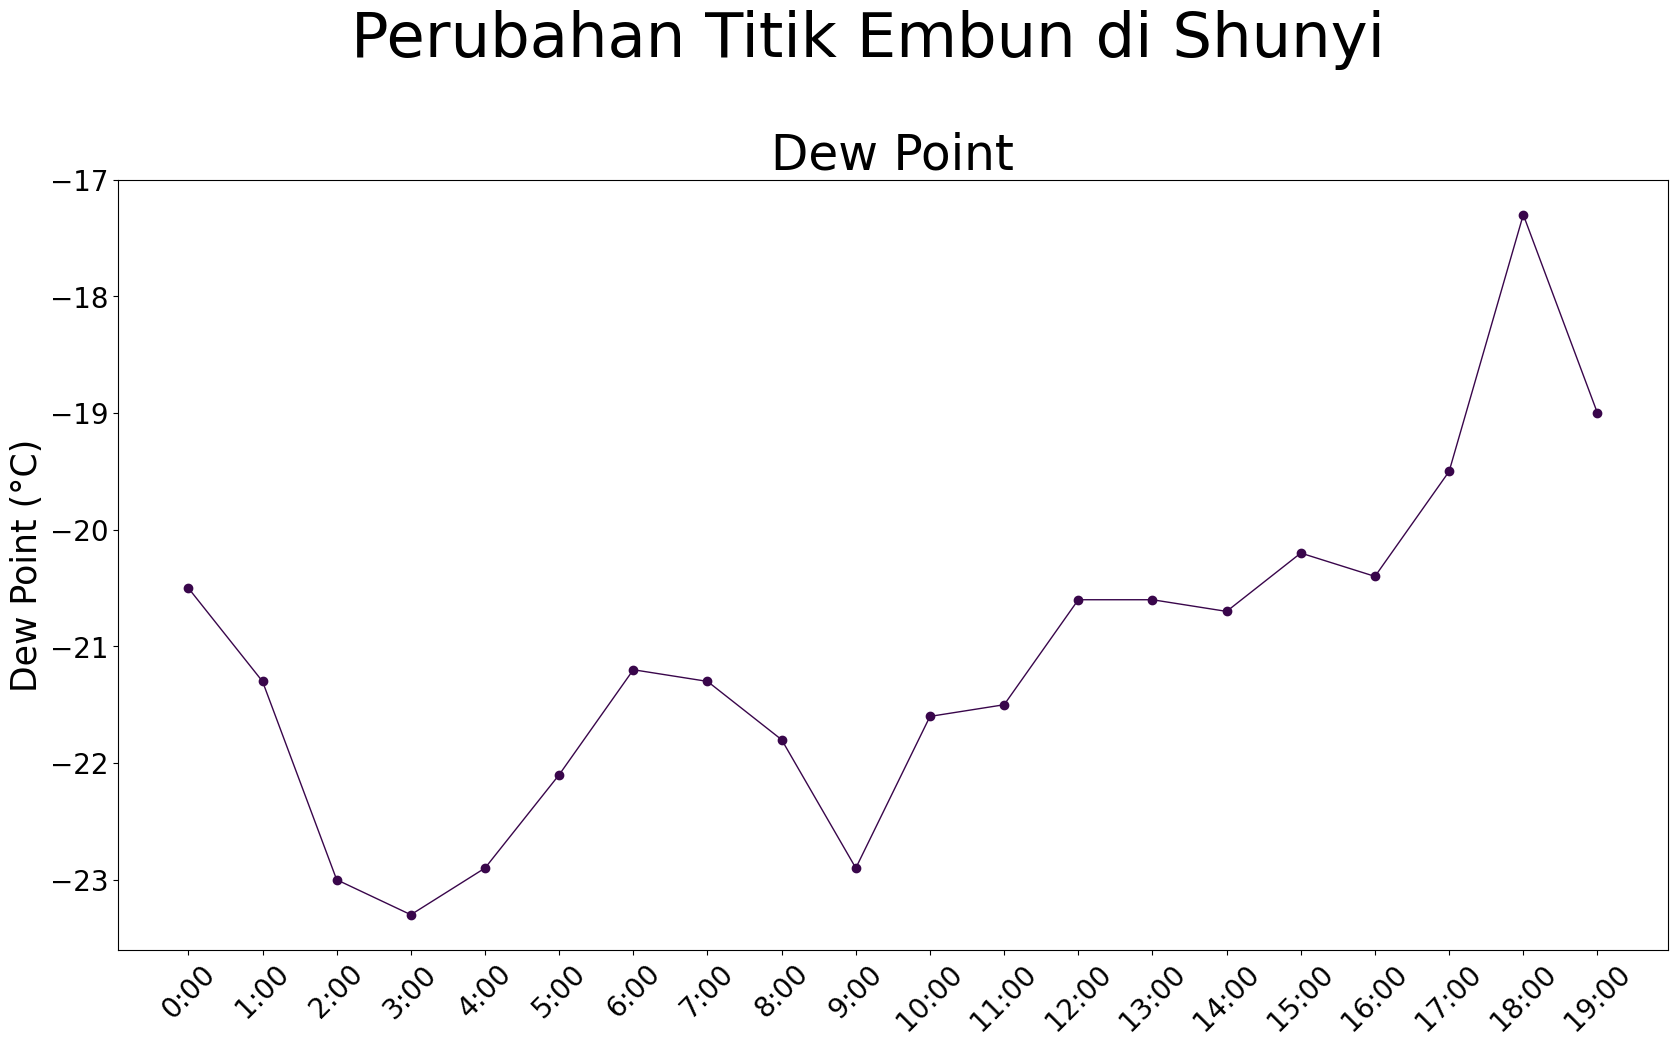

In [23]:
dewp_graph(dewp_hour.head(20))

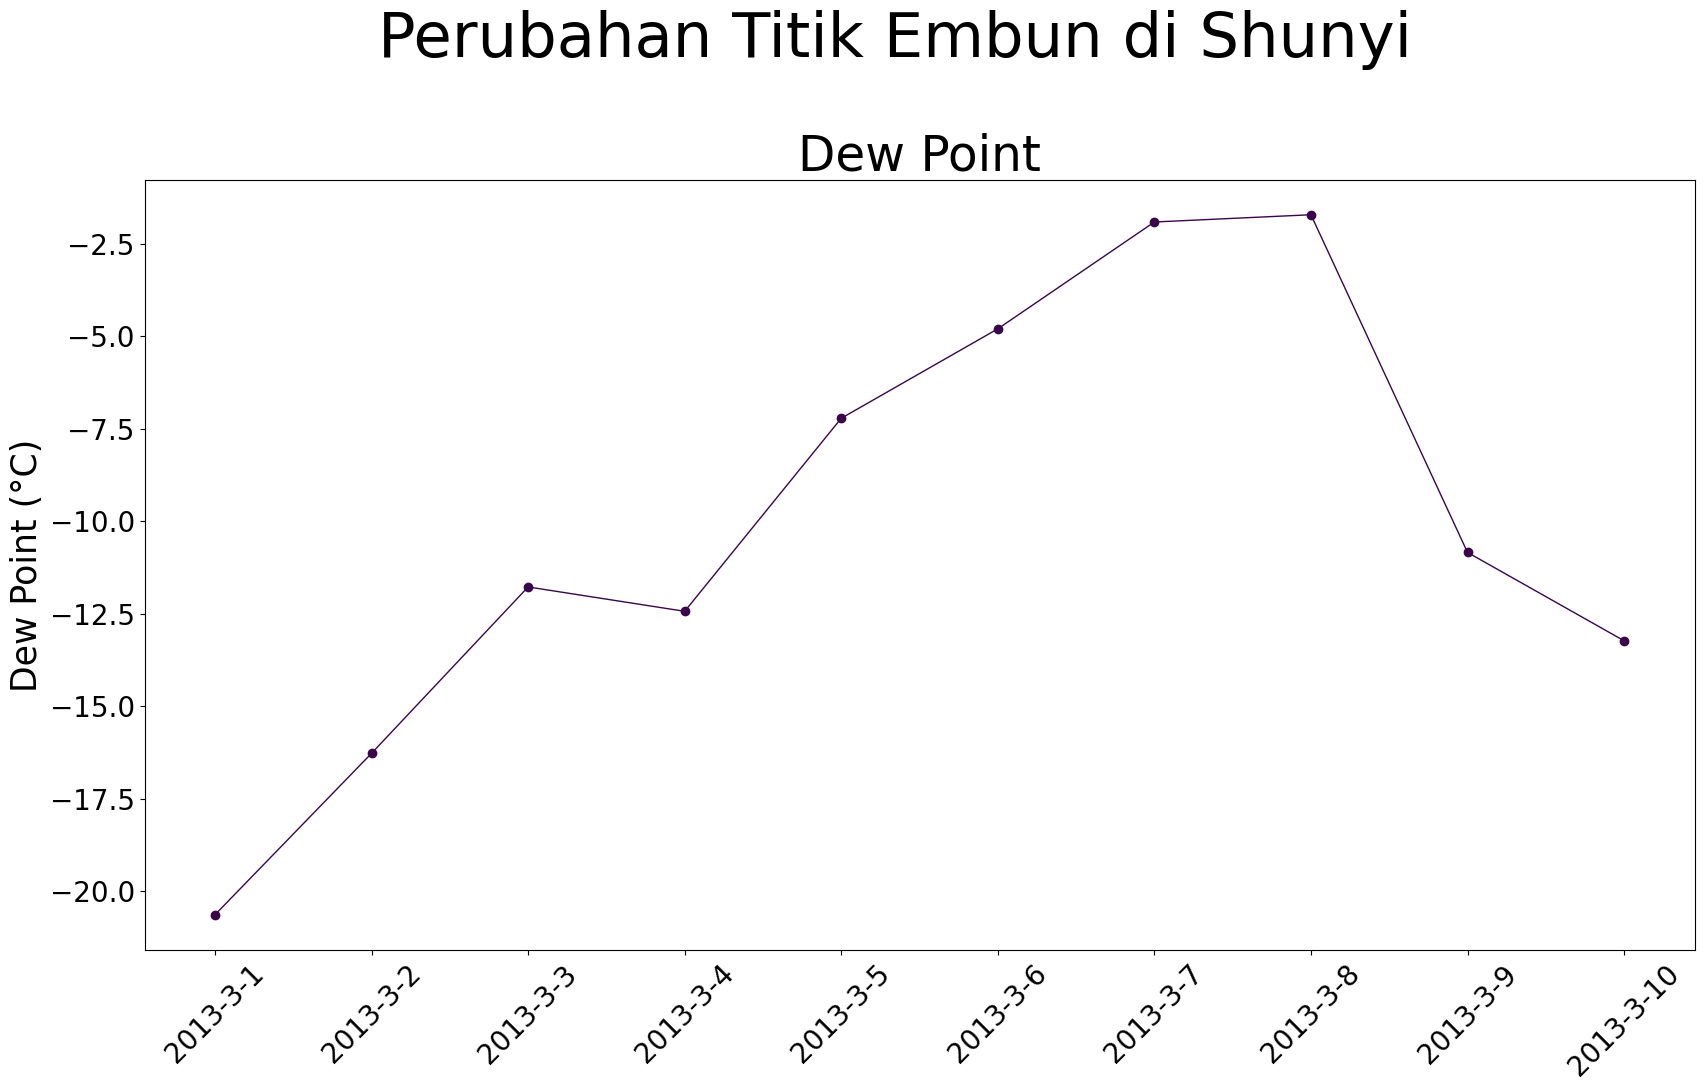

In [24]:
dewp_graph(dewp_day.head(10))

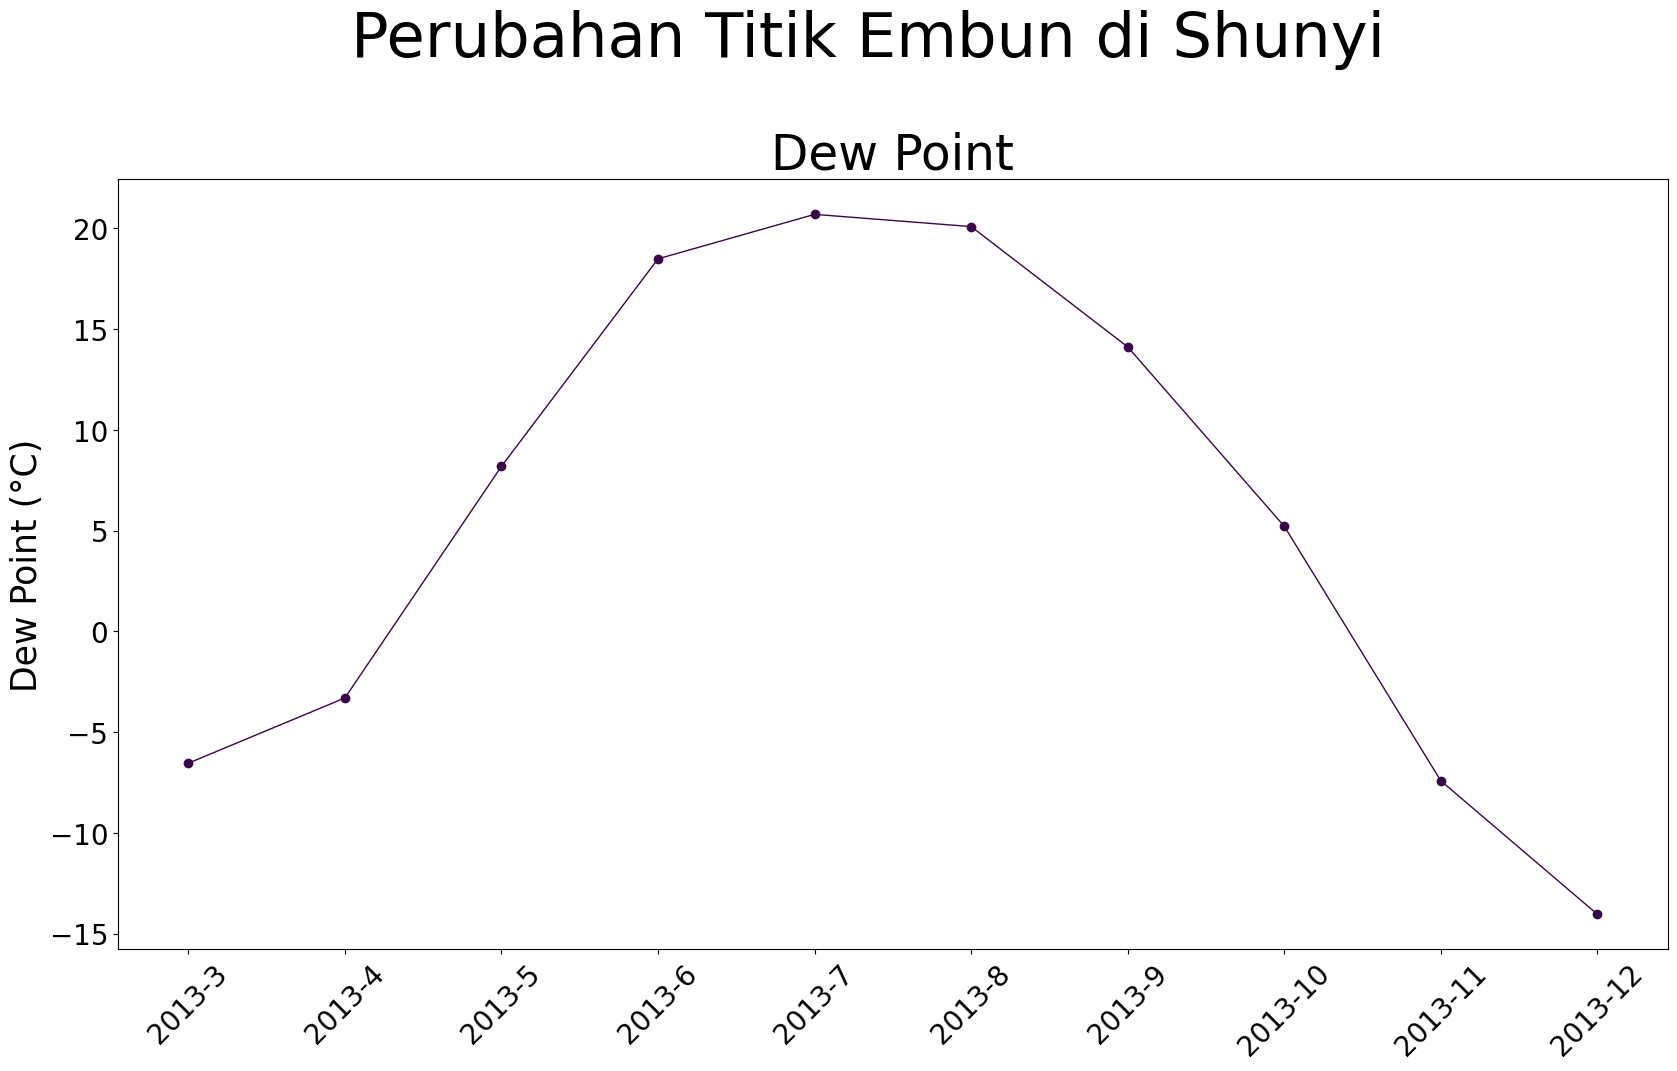

In [25]:
dewp_graph(dewp_month.head(10))

Menampilkan grafik perubahan titik embun di Shunyi dari tahun 2013 sampai 2017

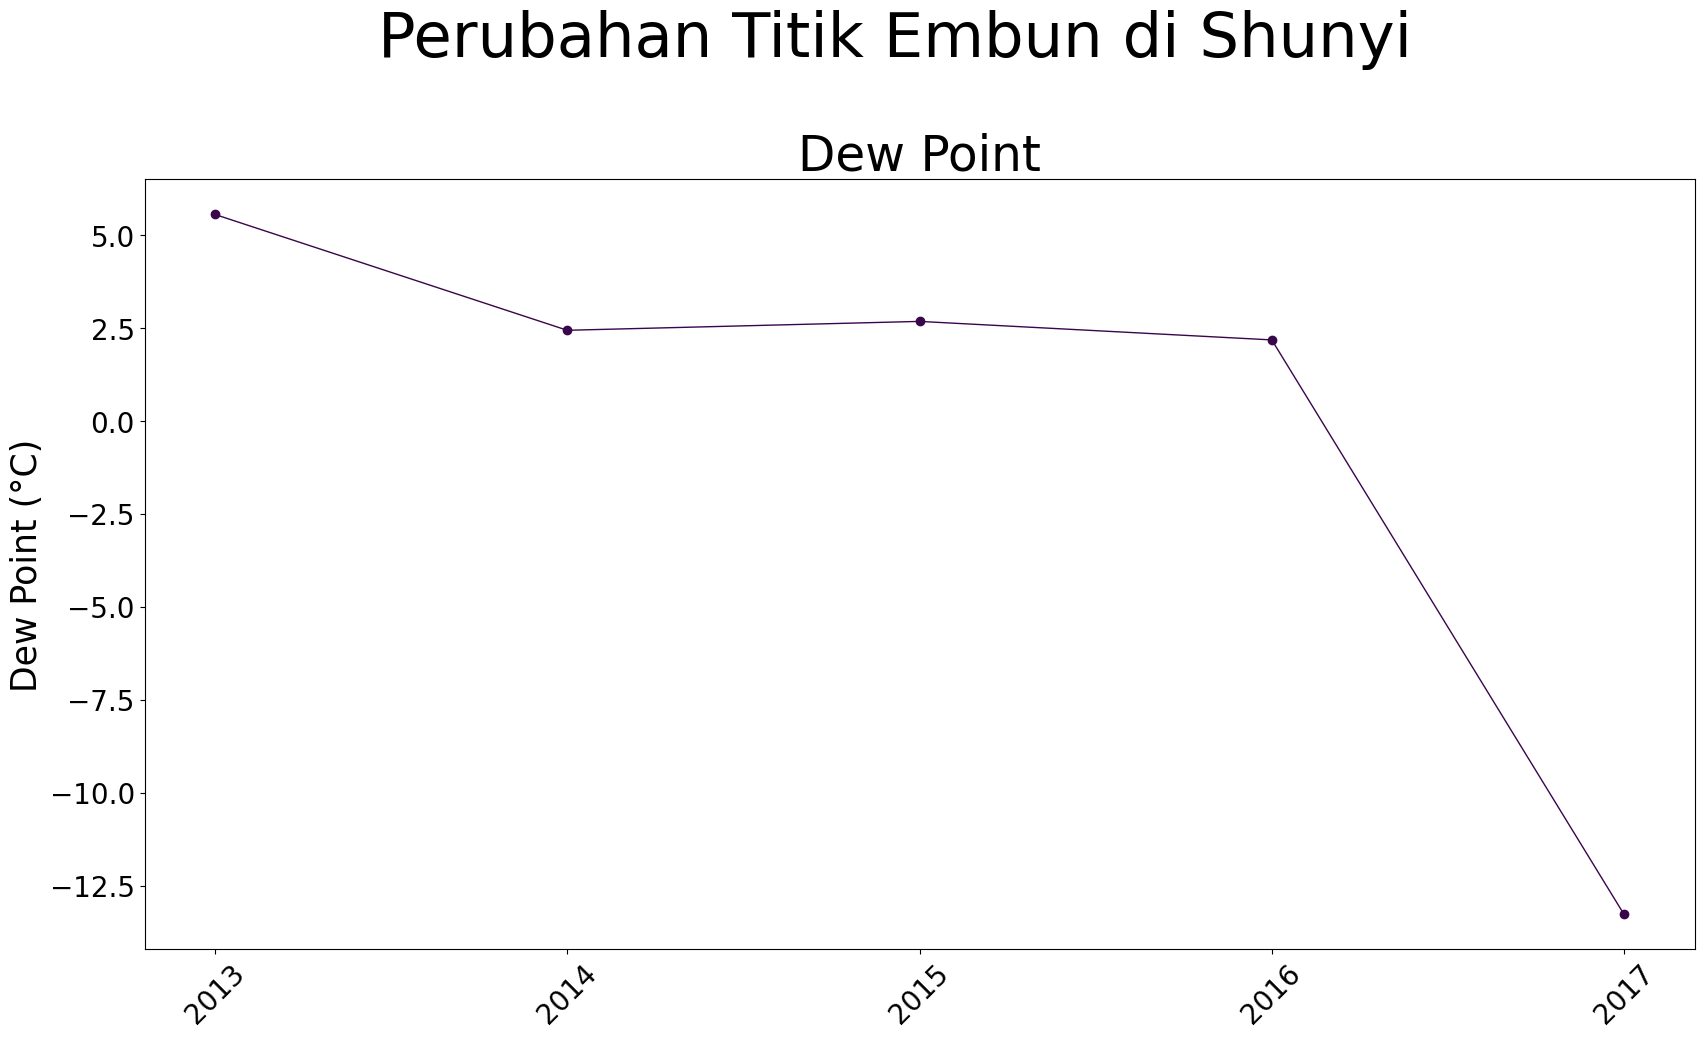

In [26]:
dewp_graph(dewp_year.head(10))

Selanjutnya ditunjukkan perhitungan rata-rata titik embun dengan fungsi `dewp_show()`.

In [27]:
def dewp_show(df):
  mean = round(df['DEWP'].mean(), 2)
  print("Rata-rata titik embun: ", str(mean)+ " °C")

Rata-rata titik embun di Shunyi

In [28]:
print("2013-03-01 pukul 00.00-19.00 \n")
dewp_show(dewp_hour.head(20))

2013-03-01 pukul 00.00-19.00 

Rata-rata titik embun:  -21.08 °C


In [29]:
print("2013-03-01 sampai 2013-03-10 \n")
dewp_show(dewp_day.head(10))

2013-03-01 sampai 2013-03-10 

Rata-rata titik embun:  -10.09 °C


In [30]:
print("2013-03 sampai 2013-10 \n")
dewp_show(dewp_month.head(10))

2013-03 sampai 2013-10 

Rata-rata titik embun:  5.55 °C


In [31]:
print("2013 sampai 2017 \n")
dewp_show(dewp_year.head(5))

2013 sampai 2017 

Rata-rata titik embun:  -0.08 °C


### Pertanyaan 2: Bagaimana perubahan hujan dan kecepatan udara di Shunyi selama periode jam, harian, bulanan, dan tahunan?

Pembuatan grafik dilakukan dengan fungsi air_parameters_graph(df). Masing-masing dataframe `air_parameters_hour`,`air_parameters_day`, `air_parameters_month`, dan `air_parameters_year` digunakan sebagai input. Ingat yang dimasukkan hanya sejumlah data awal sesuai pada tahapan eksplorasi.

In [32]:
def air_parameters_graph(df):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    ax[0].plot(df['time'], df['RAIN'], marker='o', linewidth=2, color="#39064B")
    ax[0].tick_params(axis='y', labelsize=20)
    ax[0].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[0].set_ylabel("Rain (mm)", fontsize=25)
    ax[0].set_title("Rain", loc="center", fontsize=35)
    ax[1].plot(df['time'], df['WSPM'], marker='o', linewidth=2, color="#39064B")
    ax[1].tick_params(axis='y', labelsize=20)
    ax[1].tick_params(axis='x', labelsize=20, labelrotation = 45)
    ax[1].set_ylabel("Wind Speed (km/s)", fontsize=25)
    ax[1].set_title("Wind Speed", loc="center", fontsize=35)

    fig.tight_layout(pad=2.0)

    plt.suptitle("Grafik Perubahan Hujan dan Kecepatan Udara di Shunyi", fontsize=45, y=1.05)
    plt.show()

Menampilkan grafik hujan dan kecepatan udara pada tanggal 01-03-2013 dari pukul 00.00-19.00

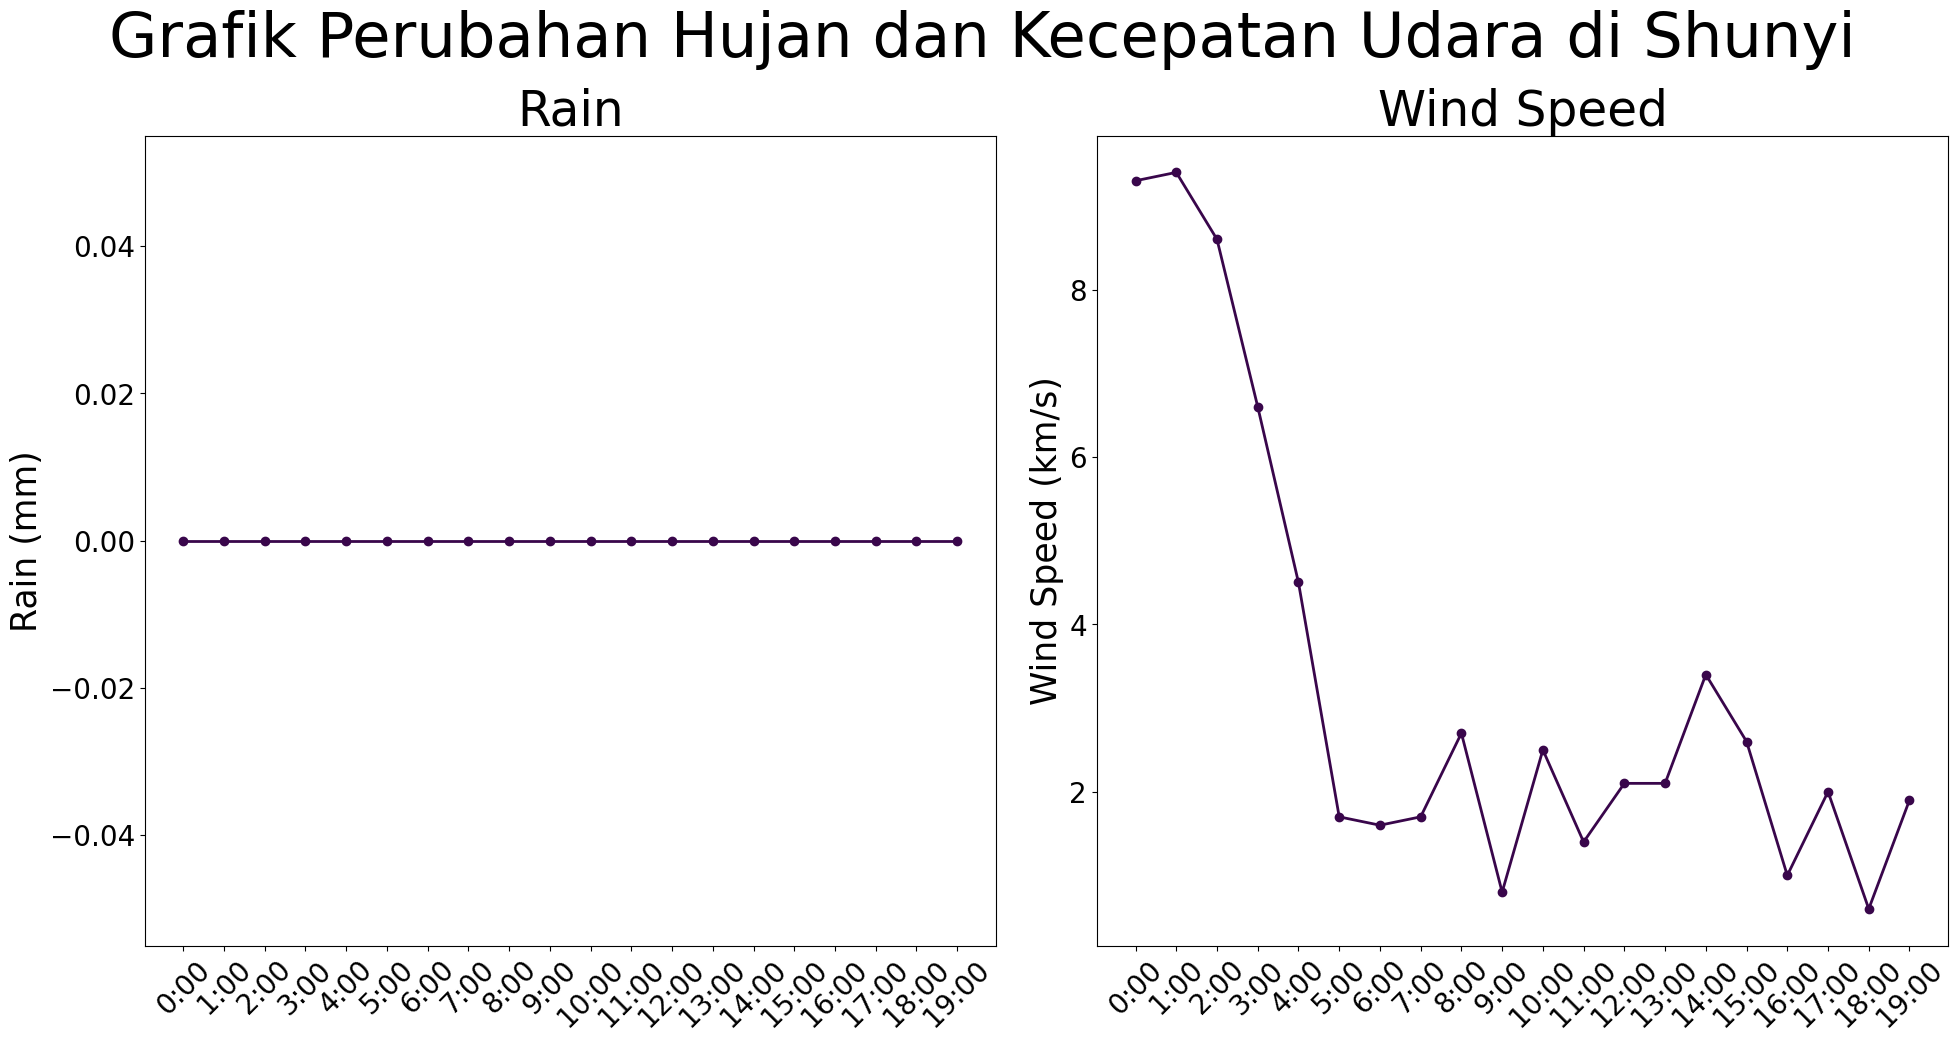

In [33]:
air_parameters_graph(air_parameters_hour.head(20))

Menampilkan grafik hujan dan kecepatan udara selama 10 hari dari tanggal 01-03-2013 sampai 10-03-2013

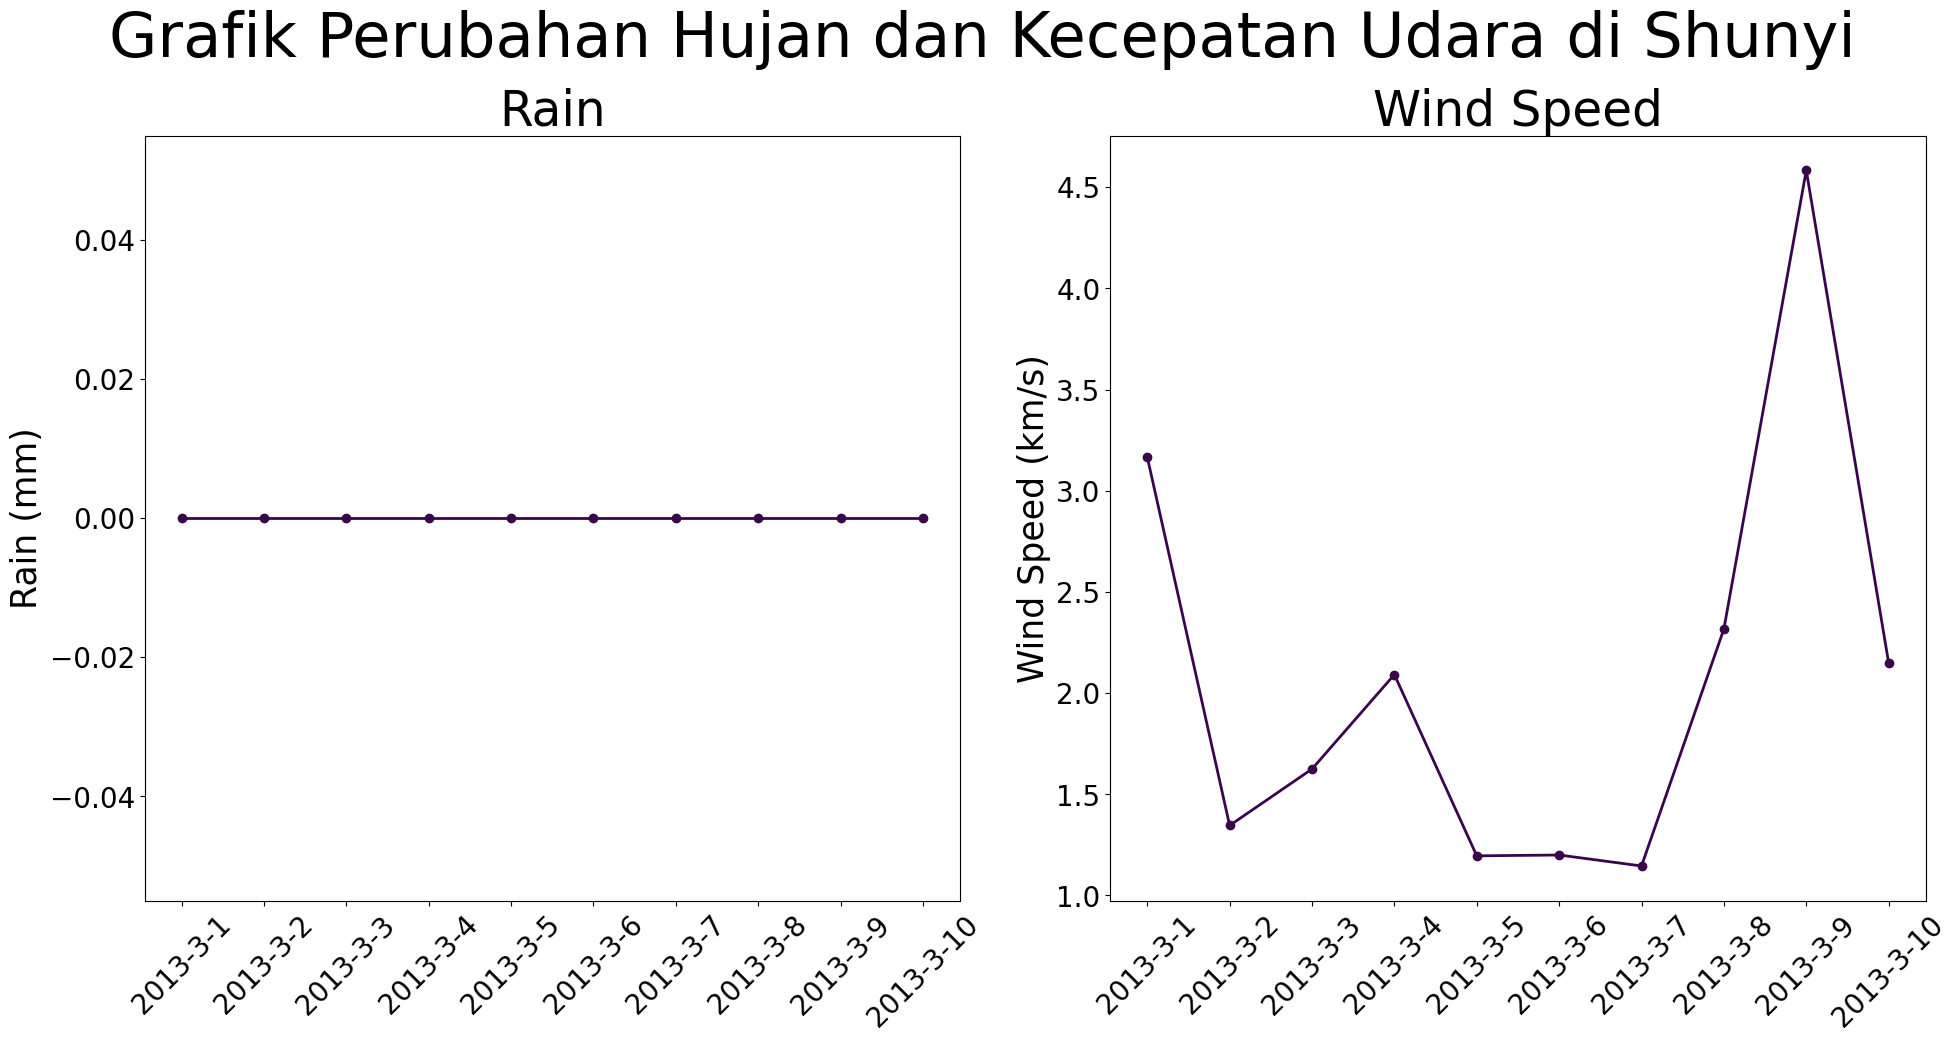

In [34]:
air_parameters_graph(air_parameters_day.head(10))

Menampilkan grafik hujan dan kecepatan udara selama 10 bulan dari bulan Maret 2013 hingga Desember 2013

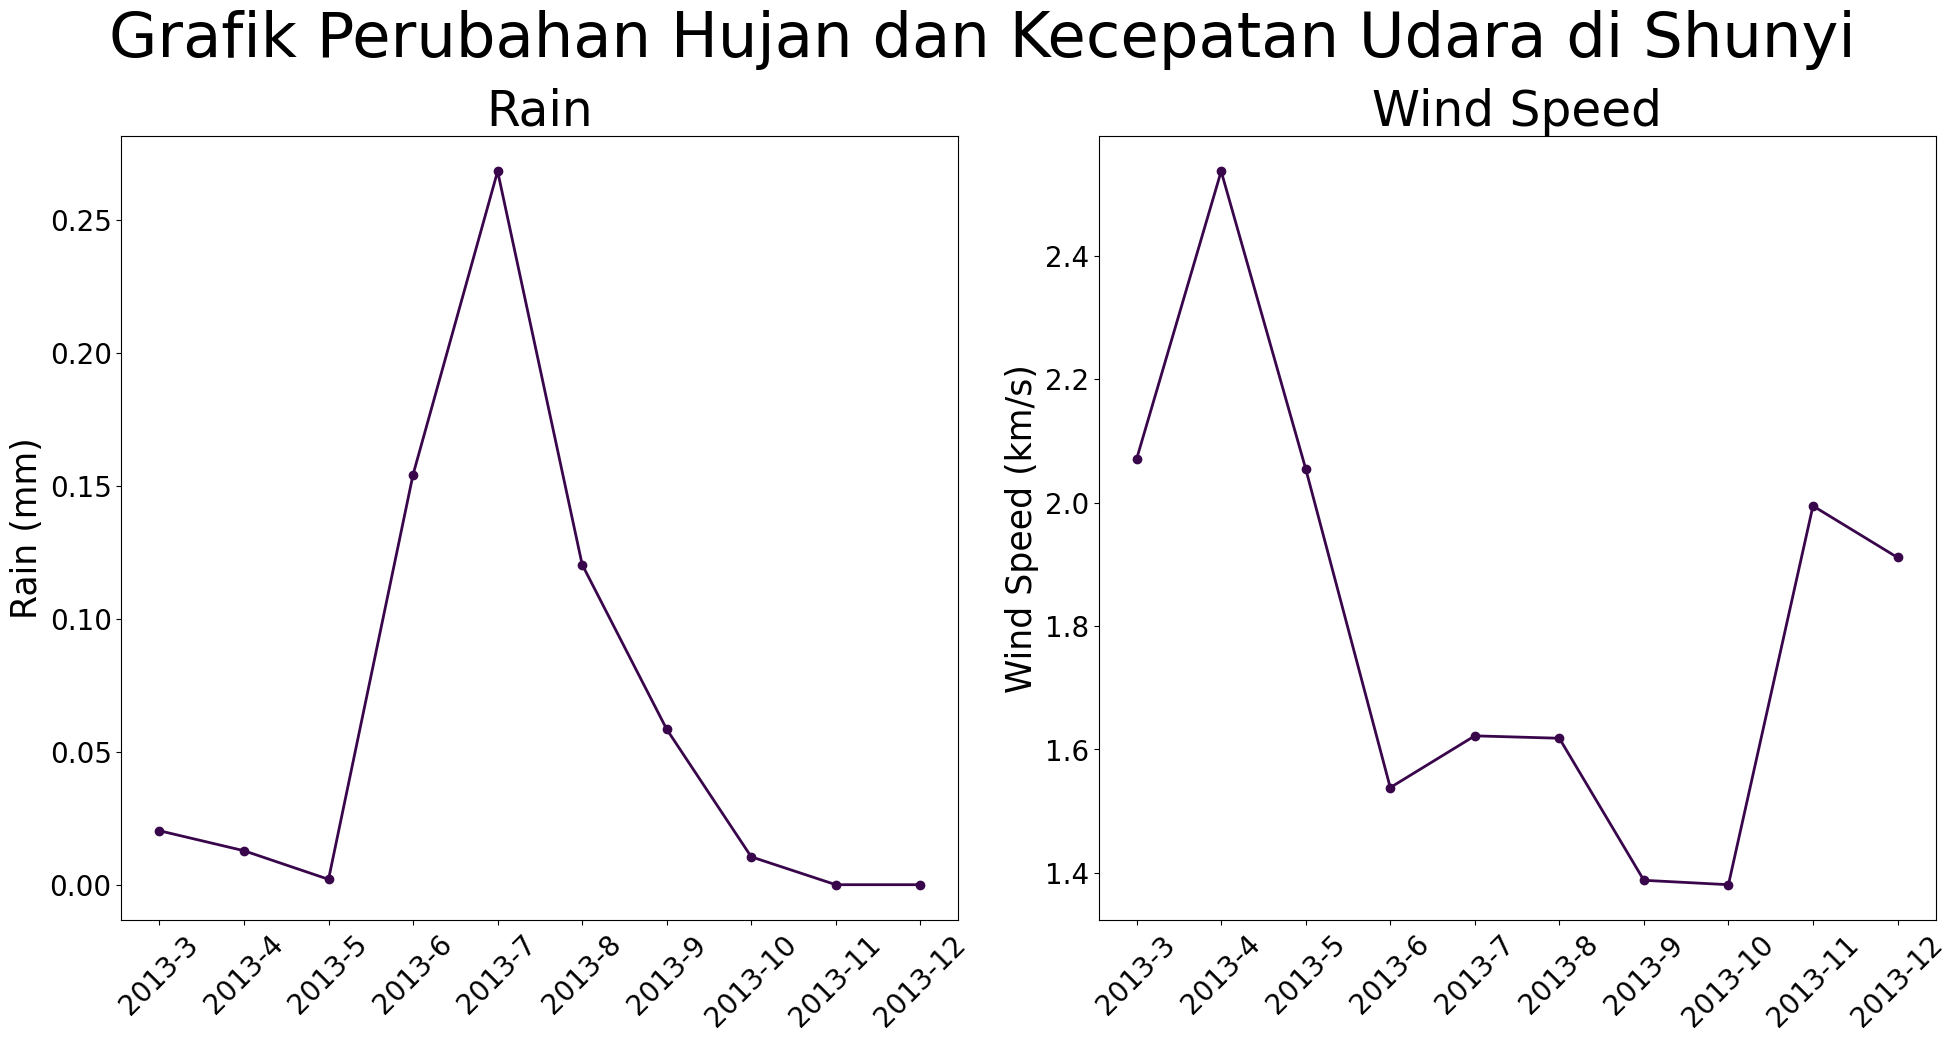

In [35]:
air_parameters_graph(air_parameters_month.head(10))

Menampilkan grafik hujan dan kecepatan udara selama 5 tahun dari tahun 2013 hingga 2017

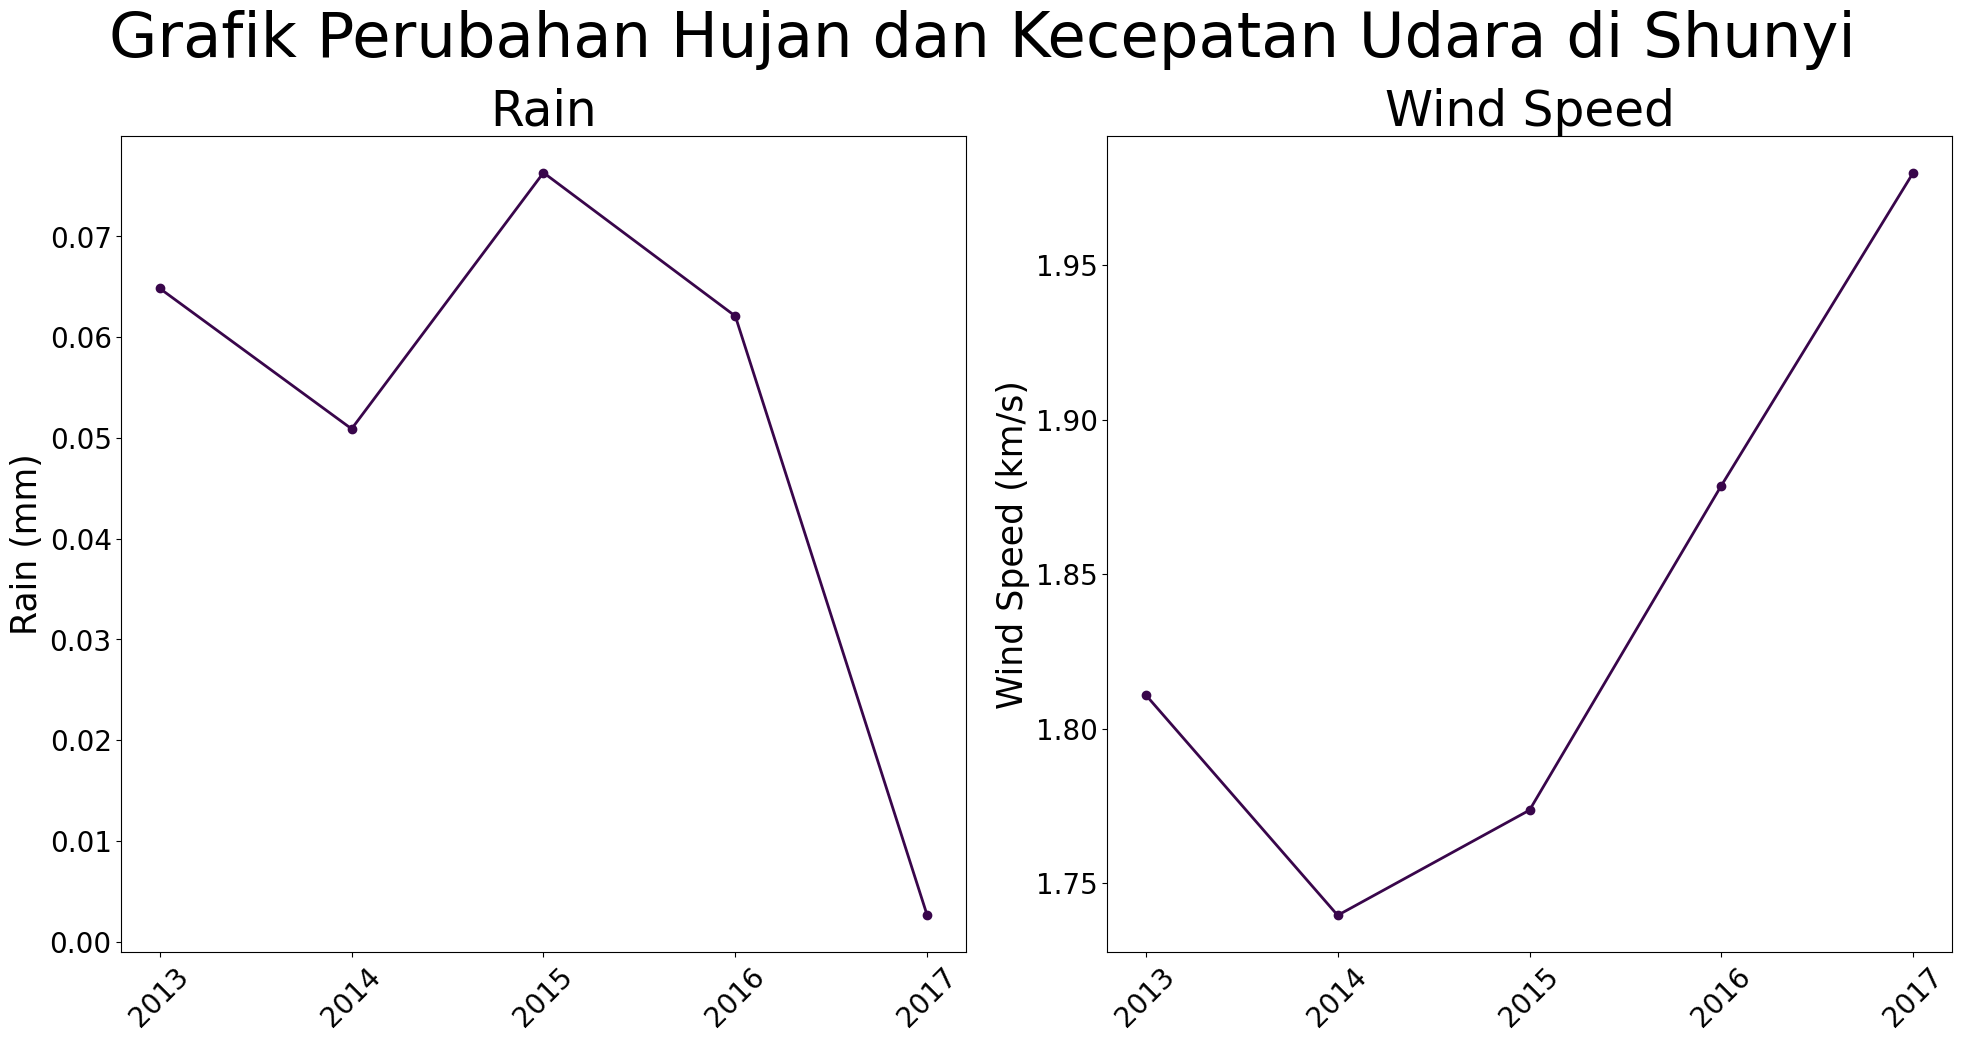

In [36]:
air_parameters_graph(air_parameters_year.head(5))

Selanjutnya ditunjukkan perhitungan rata-rata hujan dan kecepatan udara dengan fungsi `windspeed_show()`.

In [37]:
def airparameters_show(df):
    suhu= round(df['RAIN'].mean(), 2)
    tekanan= round(df['WSPM'].mean(), 2)

    print("Rata-rata hujan:", str(suhu) + " mm")
    print("Rata-rata kecepatan udara:", str(tekanan) + " km/s")

Rata-rata hujan dan kecepatan udara masing-masing per-jam, harian, bulanan serta tahunan.

In [38]:
print("01-03-2013 pukul 00.00-19.00 \n")
airparameters_show(air_parameters_hour.head(20))

01-03-2013 pukul 00.00-19.00 

Rata-rata hujan: 0.0 mm
Rata-rata kecepatan udara: 3.32 km/s


In [39]:
print("01-03-2013 sampai 10-03-2013 \n")
airparameters_show(air_parameters_day.head(10))

01-03-2013 sampai 10-03-2013 

Rata-rata hujan: 0.0 mm
Rata-rata kecepatan udara: 2.08 km/s


In [40]:
print("Maret 2013 sampai Desember 2013 \n")
airparameters_show(air_parameters_month.head(10))

Maret 2013 sampai Desember 2013 

Rata-rata hujan: 0.06 mm
Rata-rata kecepatan udara: 1.81 km/s


In [41]:
print("2013 sampai 2017 \n")
airparameters_show(air_parameters_year.head(5))

2013 sampai 2017 

Rata-rata hujan: 0.05 mm
Rata-rata kecepatan udara: 1.84 km/s


## Conclusion

- Perubahan titik embun di Shunyi selalu berubah-ubah bisa negatif ataupun positif. Nilai titik embun tertinggi pada grafik terlihat pada bulan Juli 2013. Apabila melihat grafik tahunan titik embun, nilai paling rendah pada tahun 2017.
- Perubahan curah hujan di Shunyi dari tahun 2013 hingga 2017 adalah kurang dari 0.1 mm yang berarti termasuk dalam kategori rendah. Curah hujan paling tinggi pada tahun 2015 dengan nilai 0.07mm sedangkan paling rendah pada tahun 2017 dengan nilai mendekati 0.00mm.
- Perubahan kecepatan udara di Shunyi tidak pernah konstan. Apabila dilihat dari grafik harian bulan Maret 2013 angka tertinggi mencapai 4.5km/s termasuk kategori normal atau *light air*. Dari grafik tahunan, nilai terendah ada pada tahun 2014 yaitu kurang dari 1.75km/s juga termasuk *light air*.
